In [21]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [22]:
dataset_path = 'data.json'

In [23]:
with open(dataset_path, 'r') as fp:
    data = json.load(fp)

In [24]:
inputs = np.array(data['mfcc'])
targets = np.array(data['labels'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3)

In [26]:
inputs.shape

(4993, 259, 13)

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3367)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1724416   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [30]:
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=50,
          batch_size=32)

Epoch 1/50
110/110 [==============================] - 2s 15ms/step - loss: 30.9502 - accuracy: 0.1494 - val_loss: 4.7096 - val_accuracy: 0.2497
Epoch 2/50
110/110 [==============================] - 2s 14ms/step - loss: 10.4411 - accuracy: 0.1814 - val_loss: 3.8679 - val_accuracy: 0.2343
Epoch 3/50
110/110 [==============================] - 2s 14ms/step - loss: 6.9111 - accuracy: 0.1774 - val_loss: 3.5114 - val_accuracy: 0.2497
Epoch 4/50
110/110 [==============================] - 2s 14ms/step - loss: 5.4312 - accuracy: 0.1983 - val_loss: 3.4240 - val_accuracy: 0.2543
Epoch 5/50
110/110 [==============================] - 2s 14ms/step - loss: 4.3781 - accuracy: 0.1966 - val_loss: 3.4584 - val_accuracy: 0.2563
Epoch 6/50
110/110 [==============================] - 2s 14ms/step - loss: 3.9456 - accuracy: 0.2029 - val_loss: 3.3453 - val_accuracy: 0.2991
Epoch 7/50
110/110 [==============================] - 2s 14ms/step - loss: 3.6846 - accuracy: 0.2446 - val_loss: 3.3500 - val_accuracy: 0.30

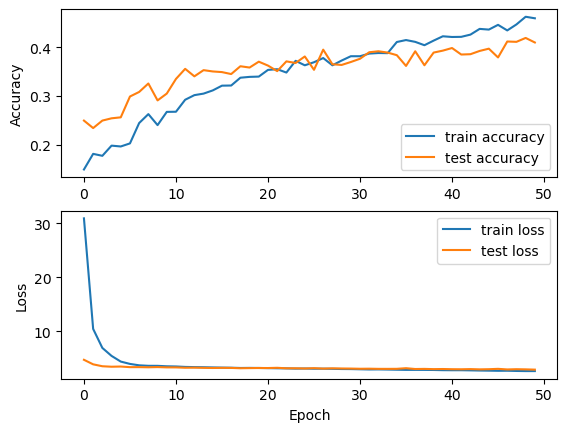

In [31]:
fig, axes = plt.subplots(2)

axes[0].plot(history.history["accuracy"], label="train accuracy")
axes[0].plot(history.history["val_accuracy"], label="test accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].legend(loc="lower right")

axes[1].plot(history.history["loss"], label="train loss")
axes[1].plot(history.history["val_loss"], label="test loss")
axes[1].set_ylabel("Loss")
axes[1].set_xlabel("Epoch")
axes[1].legend(loc="upper right")